# Import Libraries

In [104]:
# main libraries
import numpy as np
import pandas as pd

# visual libraries
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import collections
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, cohen_kappa_score
import matplotlib.pyplot as plt
import datetime
#from xgboost import XGBClassifier

In [60]:
import os
os.listdir()

['.ipynb_checkpoints',
 '11575008_merve_bayer_cmpe407_hw01.ipynb.ipynb',
 'graduate_admission.csv']

# Read Data

In [105]:
data= pd.read_csv('graduate_admission.csv')

In [55]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.info()        
                    #GRE Scores ( out of 340 )
                    #TOEFL Scores ( out of 120 )
                    #University Rating ( out of 5 ) (categorical variable -ordinal-)
                    #Statement of Purpose and Letter of Recommendation Strength (out of 5)(categorical variable -ordinal-)
                    #Undergraduate GPA ( out of 10 )
                    #Research Experience ( either 0 or 1 ) (categorical variable -nominal-)
                    #Chance of Admit ( ranging from 0 to 1 )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [6]:
data.isnull().sum() #checking null values, there is no null values.

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
data.describe() #show basic statistical details 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


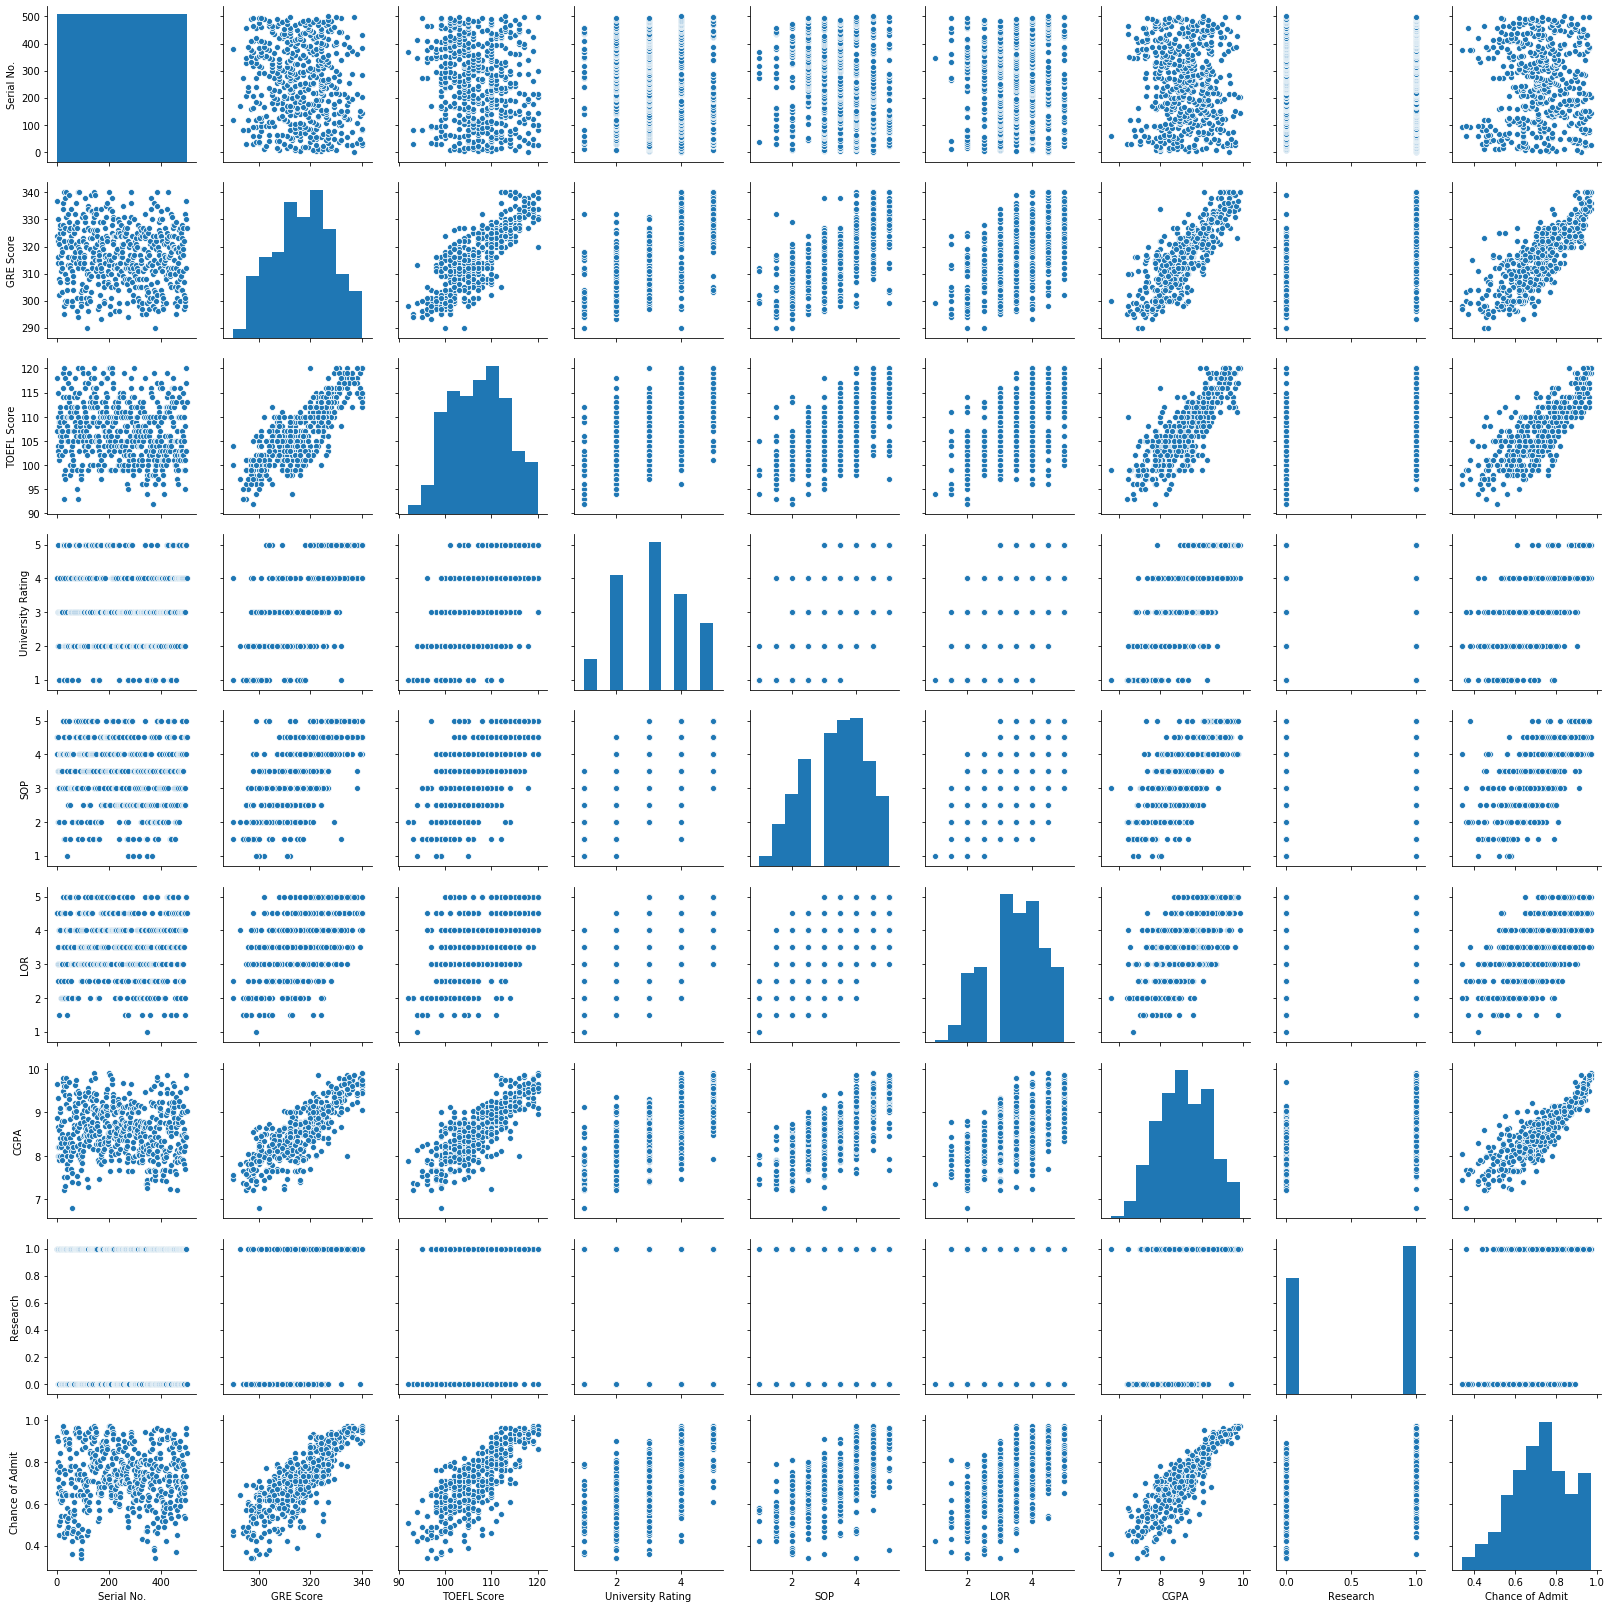

In [8]:
sns.pairplot(data) #Plot pairwise relationships in a dataset.

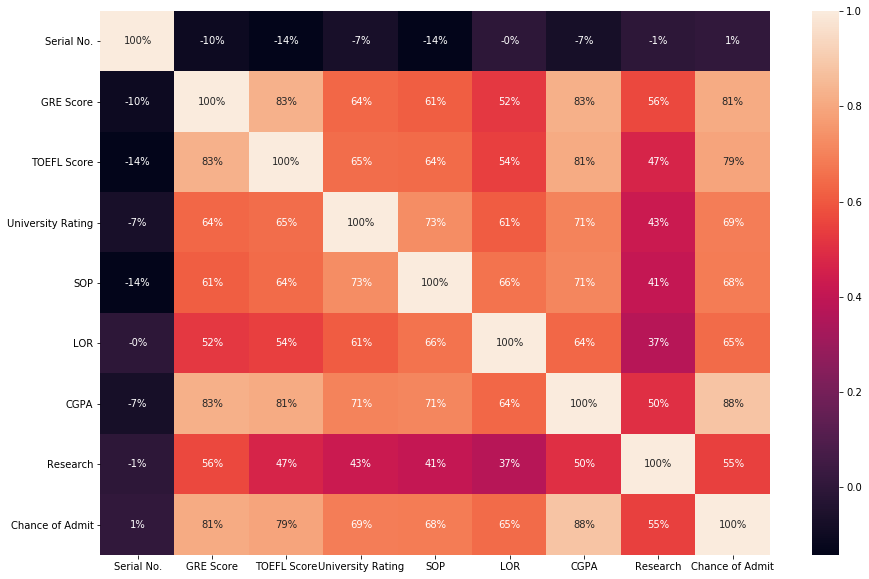

In [9]:
#visualize the correlation
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True,fmt=".0%")
plt.show()  #Serial No. has no impact on dataset, no relation with other features
            #CGPA has the most impact on Chance of Admit to university
            #GRE Score is mostly related with CGPA and then Chance of Admit
            #TOEFL Score -> GRE then CGPA
            #LOR doesnt have a big impact on data
            #CGPA -> Chance of Admit, GRE Score and Toefl
            #Research's impact is less
            #Chance of Admit -> CGPA effect is the most and research is the less.

# Line Plot

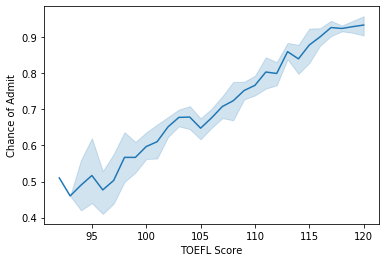

In [10]:
sns.lineplot(x='TOEFL Score', y='Chance of Admit', data=data)
#When toefl score increased, chance of admit tends to be increased 

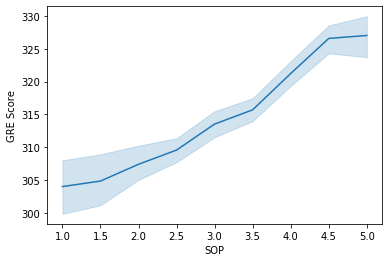

In [11]:
sns.lineplot(x='SOP', y='GRE Score', data=data)
#same as toefl

# Bar Plots

([<matplotlib.axis.XTick at 0x291d272a630>,
 <a list of 2 Text xticklabel objects>)

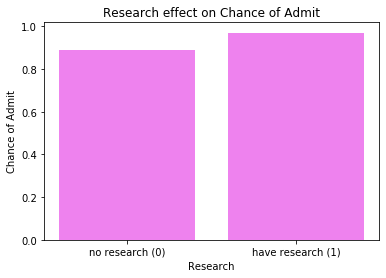

In [12]:
plt.bar(data['Research'].values, data['Chance of Admit'].values, color = 'violet')
bars = ('no research (0)', 'have research (1)')
plt.title('Research effect on Chance of Admit')
plt.xlabel('Research')
plt.ylabel('Chance of Admit')
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars)


#Having research doesn't have a big effect on chance of admit, in dataset amount of samples who have
#research are more than not having any, that's why we cannot say certain things.

# Pie Chart

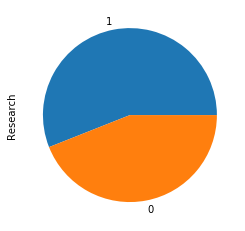

In [13]:
data['Research'].value_counts().plot.pie() 
#in dataset, number of having research experience is bigger than having no research

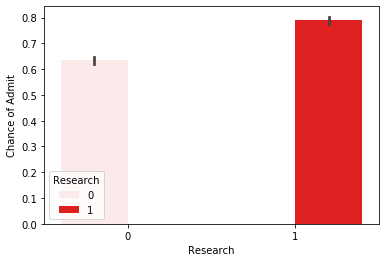

In [14]:
sns.barplot(x="Research", y='Chance of Admit', hue="Research", data=data, color='red')
#seaborn version

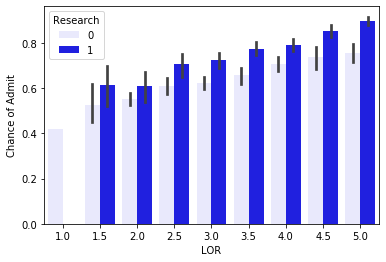

In [15]:
sns.barplot(x='LOR', y='Chance of Admit', hue="Research", data=data, color='blue')
#we cannot get much information of research effect on LOR v Chance of Admit, there is no sample which has 1 recommandation letter and research in dataset.So it seems like there is no chance when you have research and 1 letter.
#But we can say if you have more letters your chance is getting higher.

In [16]:
lor=data['LOR']
data[lor == 1] 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
347,348,299,94,1,1.0,1.0,7.34,0,0.42


# Box Plot

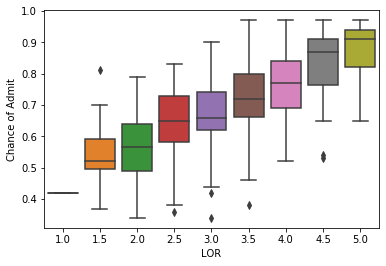

In [17]:
sns.boxplot(x='LOR', y='Chance of Admit', data=data)
#if recommendation letter is higher, possibility of admission is higher but, we can see max values, even 3 letter have a chance to get admitted
#1 letter is not enough for admission

# Violin 

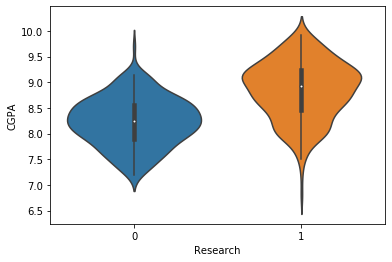

In [18]:
sns.violinplot(x='Research', y='CGPA', data=data)
#in dataset, there are too many samples which doenst have research and have CGPA between 8.0-8.7, and also have research
#and CGPA is between 8.5-9.5 

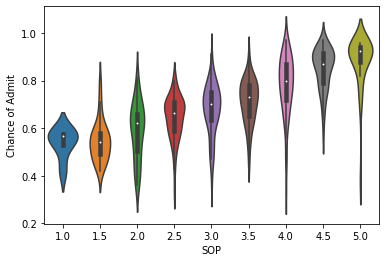

In [19]:
sns.violinplot(x='SOP', y='Chance of Admit', data=data)
#We can see that scale of SOP is big in 4 and 5.But cannot get much info.

# Scatter Plot

Text(0, 0.5, 'Chance of Admit')

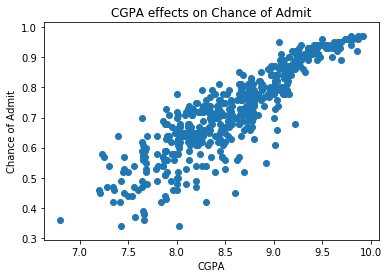

In [20]:
 #Using scatter plot
 #A scatter plot is a diagram where each value in the data set is represented by a dot.
 #The x array represents CGPA.
 #The y array represents Chance of Admit.
fig, ax = plt.subplots()

# scatter the CGPA against the Chance of Admit
ax.scatter(data['CGPA'], data['Chance of Admit'])
# set a title and labels
ax.set_title('CGPA effects on Chance of Admit')
ax.set_xlabel('CGPA')
ax.set_ylabel('Chance of Admit')
#As seen in the figure, if CGPA is high, chance of admit tends to be increased. We can say that they are correlated, CGPA has a huge effect on admission

Text(0, 0.5, 'TOEFL Score')

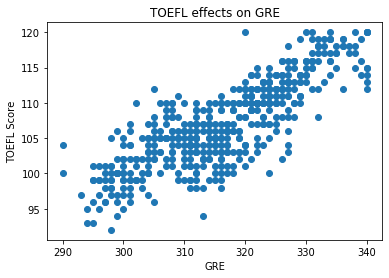

In [21]:
fig, ax = plt.subplots()

# scatter the GRE against the Toefl
ax.scatter(data['GRE Score'], data['TOEFL Score'])
# set a title and labels
ax.set_title('TOEFL effects on GRE')
ax.set_xlabel('GRE')
ax.set_ylabel('TOEFL Score')
#When Toefl is higher, GRE is higher too.

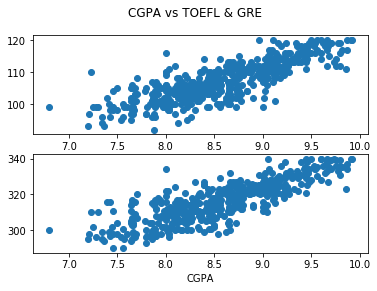

In [22]:

fig, axs = plt.subplots(2)
fig.suptitle('CGPA vs TOEFL & GRE')
axs[0].scatter(data['CGPA'], data['TOEFL Score'])
axs[1].scatter(data['CGPA'], data['GRE Score'])

for ax in axs.flat:
    ax.set(xlabel='CGPA')
    
#If toelf score is higher CGPA tends to be increased. Same for GRE Score. 

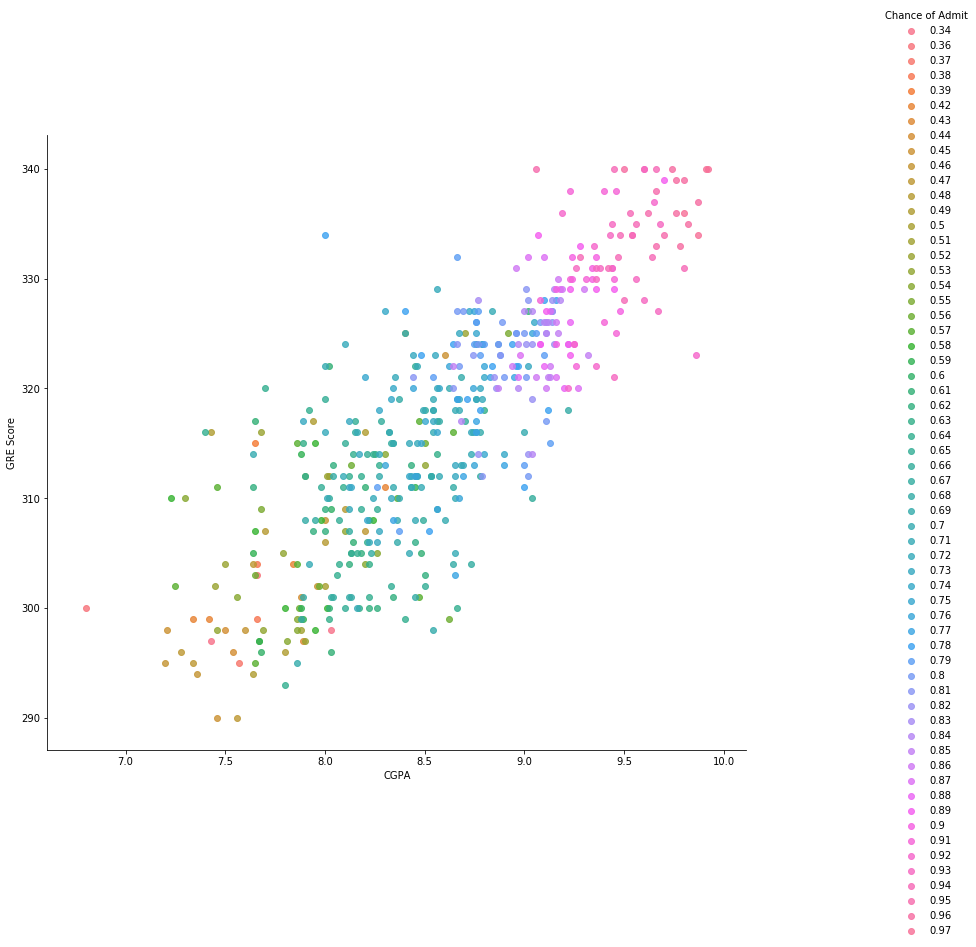

In [23]:
sns.lmplot('CGPA', 'GRE Score', data, hue='Chance of Admit', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()
#We can certainly say while GRE and CGPA are getting increased, Chance of Admit tends to be increased. They are correlated.
#If CGPA is higher than 9.5 and GRE is higher and 330, chance is almost 100%.

# Drop Unnecessary Feature

In [106]:
data= data.drop(['Serial No.'], axis=1)

# Select the features

In [107]:
X = data.drop(['Chance of Admit'], axis=1)
y = data['Chance of Admit']
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [74]:
print(X[:5])

   GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
0        337          118                  4  4.5  4.5  9.65         1
1        324          107                  4  4.0  4.5  8.87         1
2        316          104                  3  3.0  3.5  8.00         1
3        322          110                  3  3.5  2.5  8.67         1
4        314          103                  2  2.0  3.0  8.21         0


# Normalize the dataset

In [121]:
from sklearn.preprocessing import normalize

X = normalize(data, norm='l2')
X

array([[0.94325453, 0.33027903, 0.0111959 , ..., 0.02701011, 0.00279897,
        0.00257506],
       [0.94901896, 0.31341058, 0.01171628, ..., 0.02598086, 0.00292907,
        0.00222609],
       [0.9494681 , 0.31248317, 0.00901394, ..., 0.02403717, 0.00300465,
        0.00216335],
       ...,
       [0.93917091, 0.34151669, 0.01422986, ..., 0.0272075 , 0.00284597,
        0.00264675],
       [0.94902732, 0.31330069, 0.01216702, ..., 0.02564199, 0.        ,
        0.00222048],
       [0.94460974, 0.32642477, 0.01155486, ..., 0.02611398, 0.        ,
        0.00242652]])

# Divide dataset into train, validation and test sets

In [122]:
from sklearn.model_selection import train_test_split

# 80% Train, 10% Validation, %10 Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [123]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')


Total # of sample in whole dataset: 500
Total # of sample in train dataset: 400
Total # of sample in validation dataset: 50
Total # of sample in test dataset: 50


# Creating model

In [130]:
#Use regression for Continuous data
models = {
    'DecisionTree :' : DecisionTreeRegressor(),
    'Linear Regression :' : LinearRegression(),
    'RandomForest :' : RandomForestRegressor(),
    'KNeighbours :' : KNeighborsRegressor(n_neighbors = 4)
}

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  score = model.score(X_valid, y_valid)
  print(f'{m} validation score => {score}')

DecisionTree : validation score => 0.9828059178904424
Linear Regression : validation score => 0.9742251230463111
RandomForest : validation score => 0.9816560636493658
KNeighbours : validation score => 0.6356576443325961


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Evaluating the model

In [125]:
model = LinearRegression()
model.fit(X_train, y_train)

validation_score = model.score(X_valid, y_valid)
print(f'Validation score of trained model: {validation_score}')

test_score = model.score(X_test, y_test)
print(f'Test score of trained model: {test_score}')

Validation score of trained model: 0.9742251230463111
Test score of trained model: 0.9836801149155164
